In [9]:
#Sawyer Thomas 
#University of Washington Transformative Robotics Lab
#code to determine the total valid combination count for an AxB linkage lattice
#brute force computation with printed examples

import numpy as np
import matplotlib.pyplot as plt
import itertools


In [10]:
# Plot the design 
def plot_design(xs, ys,wid):
    '''plot a given lattice design
    inputs: xs: array of x values, ys: array of y values, wid: length of each horizontal linkage
    returns: none'''
    
    x,y=np.shape(np.array(xs))
    tall=y
    wide=x
    fig = plt.figure()
    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], 'go-', label='line 1', linewidth=2)
        xs=list(xs)
    test=1
    for h in range(0,tall):
        for w in range(wide-1):
            if h%2==0 and w%2==0:
                plt.plot((xs[w][h],xs[w][h]+wid),(ys[w][h],ys[w][h]), 'go-', label='line 1', linewidth=2)
            if h%2==1 and w%2==1:
                plt.plot((xs[w][h],xs[w][h]+wid),(ys[w][h],ys[w][h]), 'go-', label='line 1', linewidth=2)



In [11]:
def test_plot(charges,plot):
    '''test whether a given lattice combination will have a valid trajectory
        inputs: charges: a 2D array of [-1s and 1s],plot: boolean to decide if we should plot the array
        outputs: boolean for lattice validity'''

    x,y=np.shape(np.array(charges))
    tall=y+1
    wide=x
    #width values for array
    a=.3
    wid=1
    
    #set y values (these remain constant throughout)
    ys=[]
    height=list(range(tall))
    for w in range(wide):
        ys.append(height)
    xs=list(np.zeros((wide,tall)))

    #assign the top values
    xs[0][0]=0
    for p in range(1,wide):
        xs[p][0]=xs[p-1][0]+wid
        if p%2==0:
            xs[p][0]+=(charges[p-1][0]*a-charges[p][0]*a)

    #assign values everywhere in the array
    for h in range(1,tall):
        for w in range(wide):
            xs[w][h]=xs[w][h-1]+charges[w][h-1]*a
    
    #test to see if the array matches valid conditions
    for h in range(0,tall):
        for w in range(wide-1):
            if h%2==0 and w%2==0:
                if abs(xs[w][h]+wid-xs[w+1][h])>a/100:
                    return 0
            if h%2==1 and w%2==1:
                if abs(xs[w][h]+wid-xs[w+1][h])>a/100:
                    return 0
                
    #if plot boolean True
    if plot==1:
        xs=np.array(xs)
        xs=np.fliplr(xs)
        xs=list(xs)
        plot_design(xs,ys,wid)
    return 1


0
10000
20000
30000
40000
50000
60000
iteration count = 65536
success count = 486


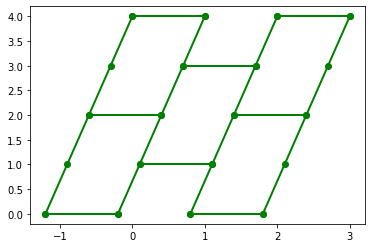

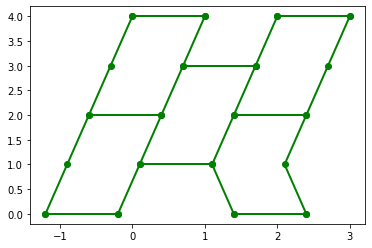

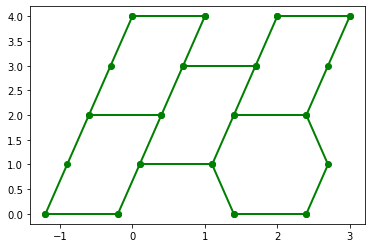

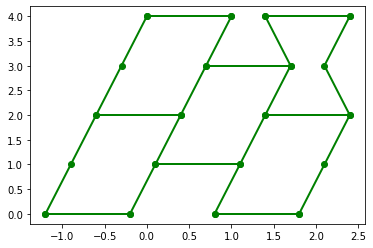

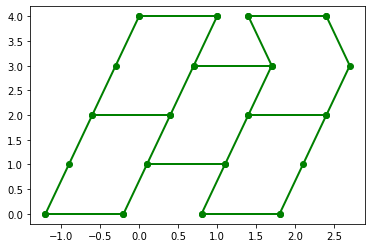

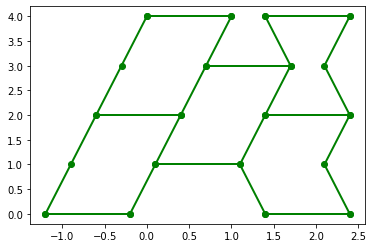

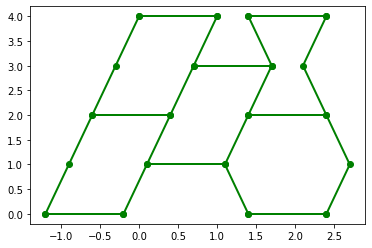

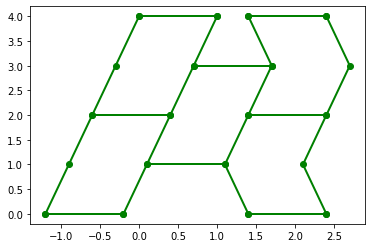

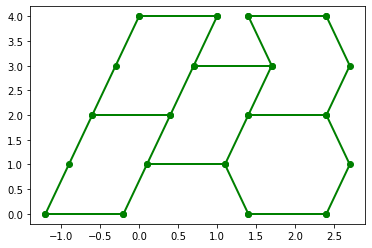

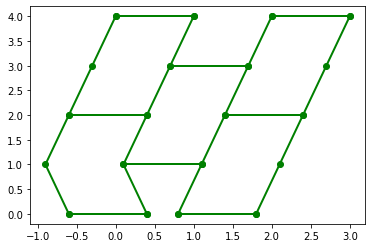

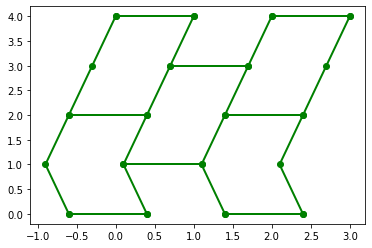

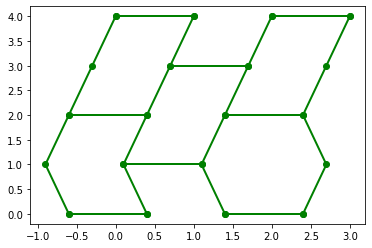

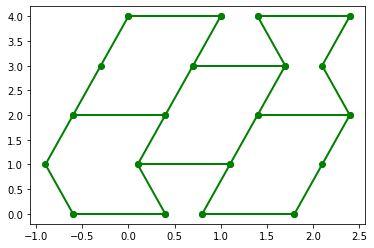

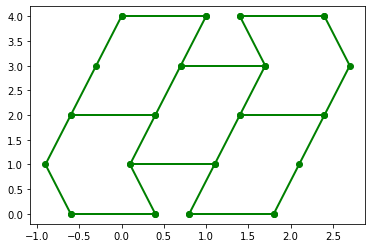

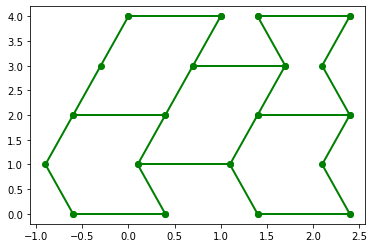

In [12]:
def combos(wid, hi):
    ''' use itertools to generate the cartesian product combinations for [-1,1] with a size of (height*width)
        inputs: # horizontal linkages (scalar), # vertical linkages (scalar) 
        outputs: iterator that will return every combo when called'''
    
    x = [-1, 1]
    length = wid*hi
    #dont turn into a list
    #just keep using as an iterator
    s=itertools.product(x, repeat=(wid*hi))
#     print(list(s))
    for shape in s:
        yield shape
    
    
    
def find_combos(hi,wid,plot_num):
    ''' algorithm tests the validity of a lattice for every possible joint combination.
        brute force computation 
        inputs: dimensions of lattice, height and width (scalars),number of graphs to plot(scalar)
        outputs: total tested combination count, total valid combination count'''
    
    count=0
    success=0
    next_combo=combos(wid,hi)
    #for all possible combinations
    for m in range(2**(wid*hi)):
        if m%10000==0: print(m) #prints the iteration count every 10,0000 tests
        shape=list(next(next_combo)) 
        count+=1
        iter_s=np.reshape(shape,(wid,hi))
        #only plot the specified ammounts of graphs
        if success<plot_num:
            s=test_plot(iter_s, 1)
        else:
            s=test_plot(iter_s, 0)
        if s ==1:
            #incrament success count
            success+=1
    return count,success




'''enter the lattice size for an AxB linkage lattice and the number of example plots'''  
plot_num=15
A=4    
B=4

count,success=find_combos(A,B,plot_num)
print('iteration count = '+ str(count))
print('success count = '+ str(success))